<a href="https://colab.research.google.com/github/rahulntandel/Data_Analytics/blob/main/DA_EDA_EXP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aim:
To perform EDA such as number of data samples, number of features, number of classes, number of data samples per class, removing missing values, conversion to numbers, using seaborn library to plot different graphs

About dataset:
Dataset is about Olympics game held from 1896 till 2016. It contains year, name, age, height, weight, game, event, medal won, country of each player who participated in those olympics.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DA CSVS/Automobile_data.csv")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
cols=['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels_engine','location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']

In [ ]:
df.columns=cols

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.isnull().sum()

symboling              0
normalized_losses      0
make                   0
fuel_type              0
aspiration             0
num_of_doors           0
body_style             0
drive_wheels_engine    0
location               0
wheel_base             0
length                 0
width                  0
height                 0
curb_weight            0
engine_type            0
num_of_cylinders       0
engine_size            0
fuel_system            0
bore                   0
stroke                 0
compression_ratio      0
horsepower             0
peak_rpm               0
city_mpg               0
highway_mpg            0
price                  0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   normalized_losses    205 non-null    object 
 2   make                 205 non-null    object 
 3   fuel_type            205 non-null    object 
 4   aspiration           205 non-null    object 
 5   num_of_doors         205 non-null    object 
 6   body_style           205 non-null    object 
 7   drive_wheels_engine  205 non-null    object 
 8   location             205 non-null    object 
 9   wheel_base           205 non-null    float64
 10  length               205 non-null    float64
 11  width                205 non-null    float64
 12  height               205 non-null    float64
 13  curb_weight          205 non-null    int64  
 14  engine_type          205 non-null    object 
 15  num_of_cylinders     205 non-null    obj

In [ ]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

symboling : [ 3  1  2  0 -1 -2]
normalized_losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel_type : ['gas' 'diesel']
aspiration : ['std' 'turbo']
num_of_doors : ['two' 'four' '?']
body_style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive_wheels_engine : ['rwd' 'fwd' '4wd']
location : ['front' 'rear']
wheel_base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  9

In [ ]:
for col in df.columns:
    df[col].replace({'?':np.nan},inplace=True)

In [ ]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.isnull().sum()

symboling               0
normalized_losses      41
make                    0
fuel_type               0
aspiration              0
num_of_doors            2
body_style              0
drive_wheels_engine     0
location                0
wheel_base              0
length                  0
width                   0
height                  0
curb_weight             0
engine_type             0
num_of_cylinders        0
engine_size             0
fuel_system             0
bore                    4
stroke                  4
compression_ratio       0
horsepower              2
peak_rpm                2
city_mpg                0
highway_mpg             0
price                   4
dtype: int64

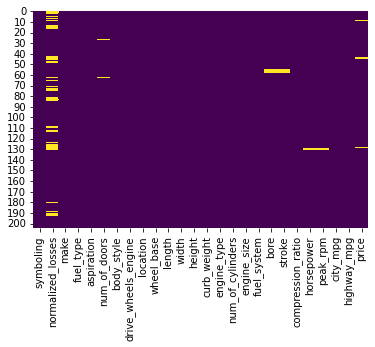

In [ ]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [ ]:
num_col = ['normalized_losses', 'bore',  'stroke', 'horsepower', 'peak_rpm','price']
for col in num_col:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels_engine,location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


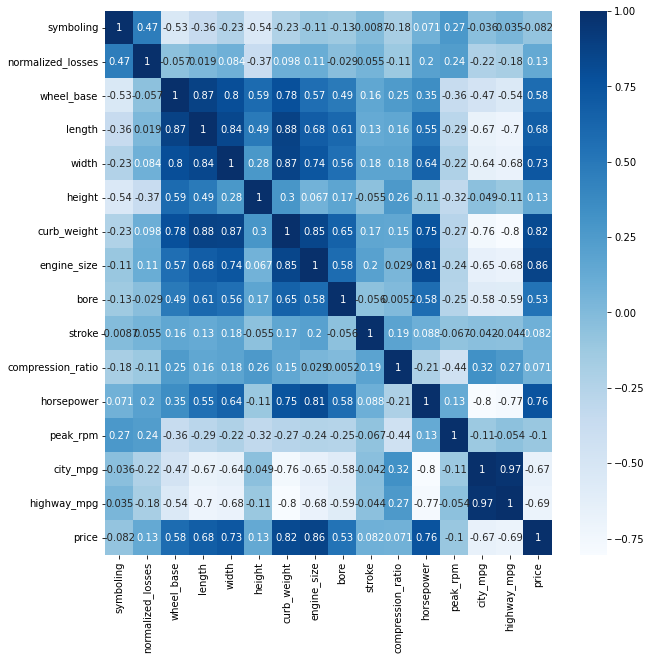

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')


Text(0, 0.5, 'Price')

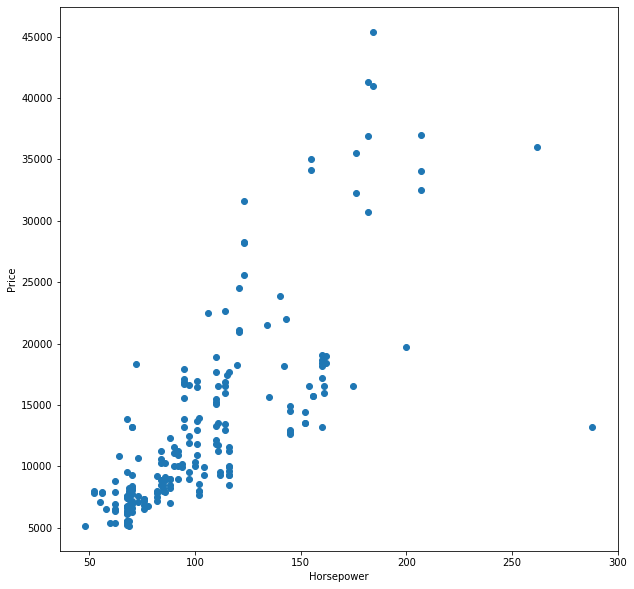

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='horsepower',y='price',data=df)
plt.xlabel('Horsepower')
plt.ylabel('Price')

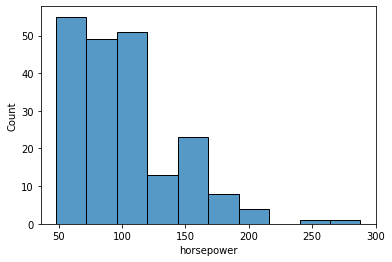

In [ ]:
sns.histplot(df.horsepower,bins=10)

Text(0, 0.5, 'Price')

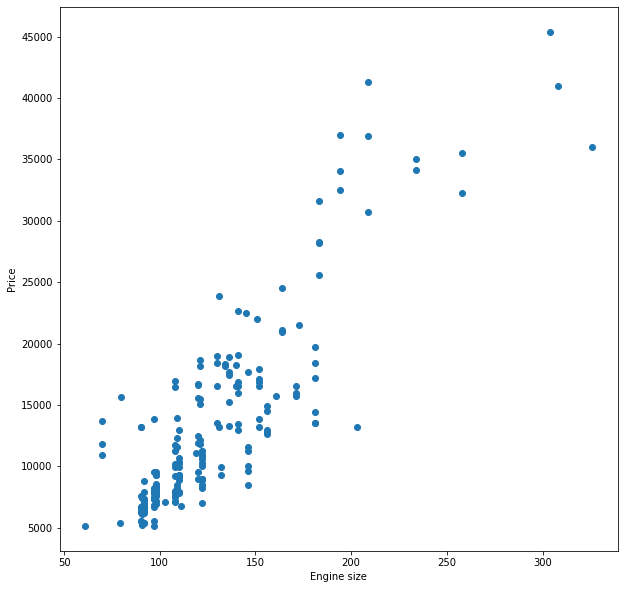

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='engine_size',y='price',data=df)
plt.xlabel('Engine size')
plt.ylabel('Price')


Text(0, 0.5, 'Price')

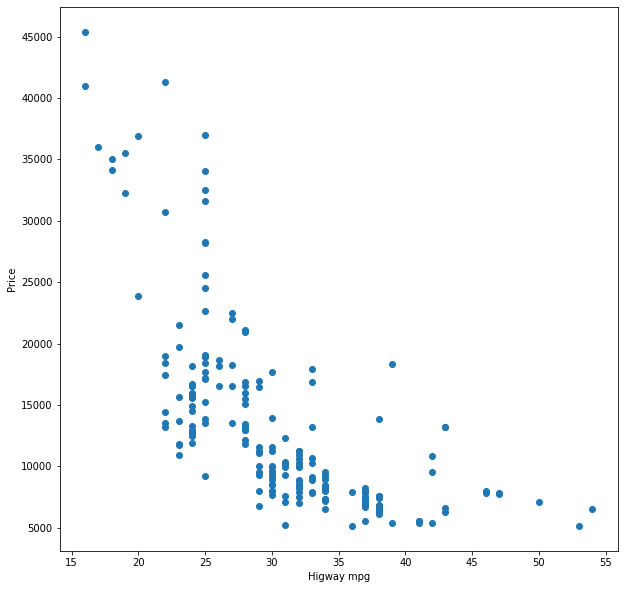

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x='highway_mpg',y='price',data=df)
plt.xlabel('Higway mpg')
plt.ylabel('Price')

In [ ]:
#Unique values in num_of_doors
df.num_of_doors.value_counts()

four    114
two      89
Name: num_of_doors, dtype: int64

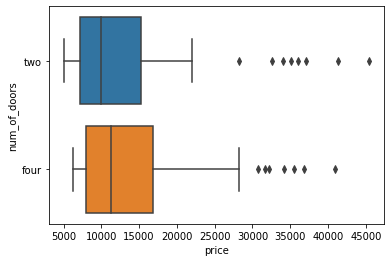

In [ ]:
sns.boxplot(x='price',y='num_of_doors',data=df)